In [25]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import os

In [26]:
#read in the data
data_path = "./Reviews.csv"

pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]
#pd_data.head(10)

In [27]:
#get the data we need
review_data = pd.DataFrame(pd_data["UserId"])
review_data.insert(1,column="ProfileName",value=pd_data["ProfileName"])
review_data.insert(2,column="Score",value=pd_data["Score"])

#review_data.head(10)

In [28]:
#calculate the mean of score
mean_score = review_data.groupby(by=["UserId","ProfileName"],as_index=False).mean()
#mean_score = mean_score.sort_values(by="ProfileName",ascending=False)

#mean_score.head(10)

In [29]:
#count the number of reviewer
review_data = review_data.groupby(by=["UserId","ProfileName"],as_index=False).size().reset_index(name='Score count')

#insert the mean score
review_data.insert(3,column="Score mean",value=mean_score["Score"])

#sort by number of reviews
review_data = review_data.sort_values(by="Score count",ascending=False)

review_data.head(10)


,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


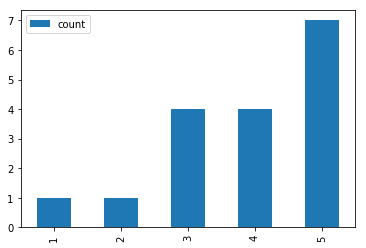

In [30]:
#get the user with the most number of reviews
max_review = pd.DataFrame(review_data.head(1))
user = max_review.ProfileName.to_string(index=False)
user = user.split(" ")[1]

max_user = pd_data[pd_data.ProfileName == user]

#max_user.head(10)
plt_data = pd.DataFrame({'count':max_user["Score"].value_counts(ascending=True)})
plt_data.plot.bar()

In [31]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [32]:
#convert time to date
import time

time_data = pd.DataFrame(pd_data)
#.sort_values(by="Time",ascending=False)

def convertdate(x):
    tmp = time.localtime(x)
    year = tmp.tm_year
    return year

time_data["Time"] = time_data["Time"].apply(convertdate)
#for ele in time_data["Time"].values:
#    time_data["Time"] = time.localtime(ele)
#time_data["Time"].values

time_data = time_data[["UserId","ProfileName","Time"]]

time_data.head(10)

,UserId,ProfileName,Time
0,A3SGXH7AUHU8GW,delmartian,2011
1,A1D87F6ZCVE5NK,dll pa,2012
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",2008
3,A395BORC6FGVXV,Karl,2011
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",2012
5,ADT0SRK1MGOEU,Twoapennything,2012
6,A1SP2KVKFXXRU1,David C. Sullivan,2012
7,A3JRGQVEQN31IQ,Pamela G. Williams,2012
8,A1MZYO9TZK0BBI,R. James,2011
9,A21BT40VZCCYT4,Carol A. Reed,2012


In [33]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012,Great taffy,Great taffy at a great price. There was a wid...


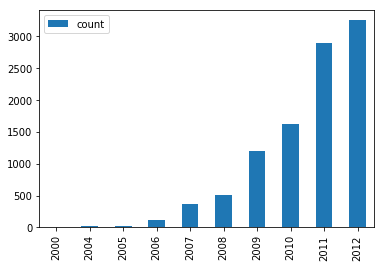

In [34]:
plt_time = pd.DataFrame({'count':time_data["Time"].value_counts(ascending=True)})
plt_time.plot.bar()

In [37]:
#heatmap 
hmap_data = pd.DataFrame(pd_data["UserId"])
hmap_data.insert(1,column="HelpfulnessNumerator",value=pd_data["HelpfulnessNumerator"])
hmap_data.insert(2,column="HelpfulnessDenominator",value=pd_data["HelpfulnessDenominator"])
hmap_data.insert(3,column="Score",value=pd_data["Score"])
hmap_data.insert(4,column="Time",value=pd_data["Time"])
#Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time

#sns.heatmap(hmap_data)
hmap_data.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,A3SGXH7AUHU8GW,1,1,5,2011
1,A1D87F6ZCVE5NK,0,0,1,2012
2,ABXLMWJIXXAIN,1,1,4,2008
3,A395BORC6FGVXV,3,3,2,2011
4,A1UQRSCLF8GW1T,0,0,5,2012
